In [2]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
import math

plt.style.use('ggplot')

In [4]:
credit_card_data = pd.read_csv('BankCustomers.csv')

# Analysing the Data

Let's take a look at what the dataset looks like.

In [8]:
credit_card_data.shape

(10127, 21)

In [10]:
credit_card_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [12]:
credit_card_data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [68]:
# Taking a look at the column statistics
credit_card_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.0,46.325960,8.016814,26.0,41.000,46.000,52.000,73.000
Dependent_count,10127.0,2.346203,1.298908,0.0,1.000,2.000,3.000,5.000
Months_on_book,10127.0,35.928409,7.986416,13.0,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.0,3.812580,1.554408,1.0,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.0,2.341167,1.010622,0.0,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.0,2.455317,1.106225,0.0,2.000,2.000,3.000,6.000
Credit_Limit,10127.0,8631.953698,9088.776650,1438.3,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.0,1162.814061,814.987335,0.0,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.0,7469.139637,9090.685324,3.0,1324.500,3474.000,9859.000,34516.000
Total_Amt_Chng_Q4_Q1,10127.0,0.759941,0.219207,0.0,0.631,0.736,0.859,3.397


We can see that the change in transaction amount/count from Q4 to Q1 is at 0.76/0.71,indicating a reduction in spending in customer credit behaviour, we will explore the rest of the data further.

In [16]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [18]:
# Checking unique values of all columns
credit_card_data.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [20]:
# No null values present
credit_card_data.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [22]:
# No duplicated values present as well
credit_card_data.duplicated().sum()

0

# Data Reduction

In [25]:
# Dropping CLIENTNUM as it does not help our analysis since it has no significance besides being a unique customer identifier
credit_card_data = credit_card_data.drop(["CLIENTNUM"], axis = 1)
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

# Analysis and Visualizations


After an initial look at our data, we can see that:
- there are no null values or duplicates
- the number of unique values for each column looks correct and reasonable

In [29]:
# Filtering categorical columns out for easier analysis
cat_cols = credit_card_data.select_dtypes(include = ['object']).columns

### Reviewing Categorical Data

Let's first take a look at the categorical columns by generating some count plots.


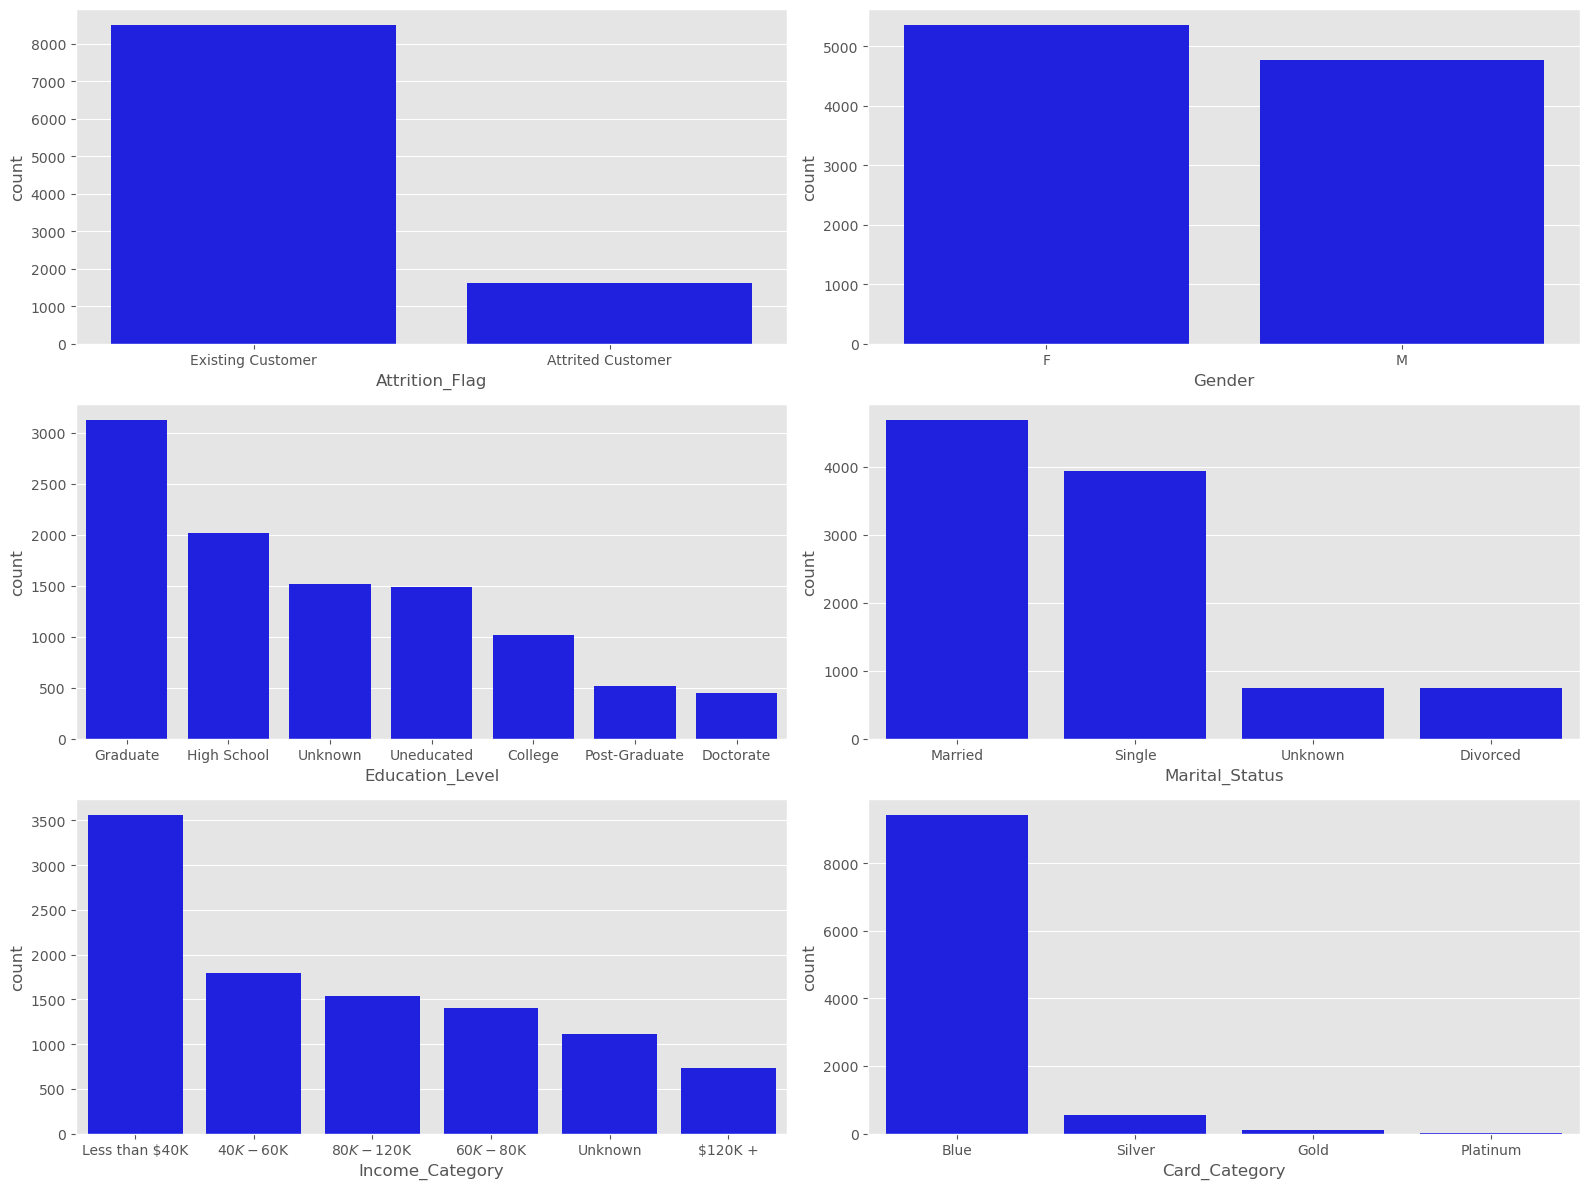

In [97]:
# Set up the grid layout for 2 columns
num_plots = len(cat_cols)
ncols = 2
nrows = math.ceil(num_plots / ncols)

# Adjust the figure size/axes
fig, axes = plt.subplots(nrows = nrows, ncols = 2, figsize = (16, nrows * 4))
axes = axes.flatten()

# Loop through each categorical column and create a count plot for each
for i, column in enumerate(cat_cols):
    order = credit_card_data[column].value_counts().index
    sns.countplot(x = column, data = credit_card_data, ax = axes[i], color = 'blue', order = order)

plt.tight_layout()
plt.show()

##### Review of categorical data distribution:
- There are unknown columns in education_level, marital_status and income_category.
- Card holders are overwhelmingly in the 'blue' category compared to higher tiers like silver/gold/platinum.
- Education level of customers are highest at the graduate level followed by high school.
- There is a high amount of customers with less than $40K salary relative to other income categories.


In [34]:
# Taking a look at how much unknown data we are dealing with
unknown_percentage = (credit_card_data == 'Unknown').mean() * 100
unknown_percentage

Attrition_Flag               0.000000
Customer_Age                 0.000000
Gender                       0.000000
Dependent_count              0.000000
Education_Level             14.999506
Marital_Status               7.396070
Income_Category             10.980547
Card_Category                0.000000
Months_on_book               0.000000
Total_Relationship_Count     0.000000
Months_Inactive_12_mon       0.000000
Contacts_Count_12_mon        0.000000
Credit_Limit                 0.000000
Total_Revolving_Bal          0.000000
Avg_Open_To_Buy              0.000000
Total_Amt_Chng_Q4_Q1         0.000000
Total_Trans_Amt              0.000000
Total_Trans_Ct               0.000000
Total_Ct_Chng_Q4_Q1          0.000000
Avg_Utilization_Ratio        0.000000
dtype: float64

We have **14%, 7% and 11%** of 'Unknown' string in education_level, marital_status and income_category respectively. To deal with this, we will keep them in a seperate category as it is possible customers in these fields do not want to reveal their marital status/income/education level.

### Income Category

In the credit card data analysis, income is one of the most crucial factors in determining a customer's creditworthiness, spending capacity, and overall financial health. 


In [40]:
# Reviewing data in income category
credit_card_data['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

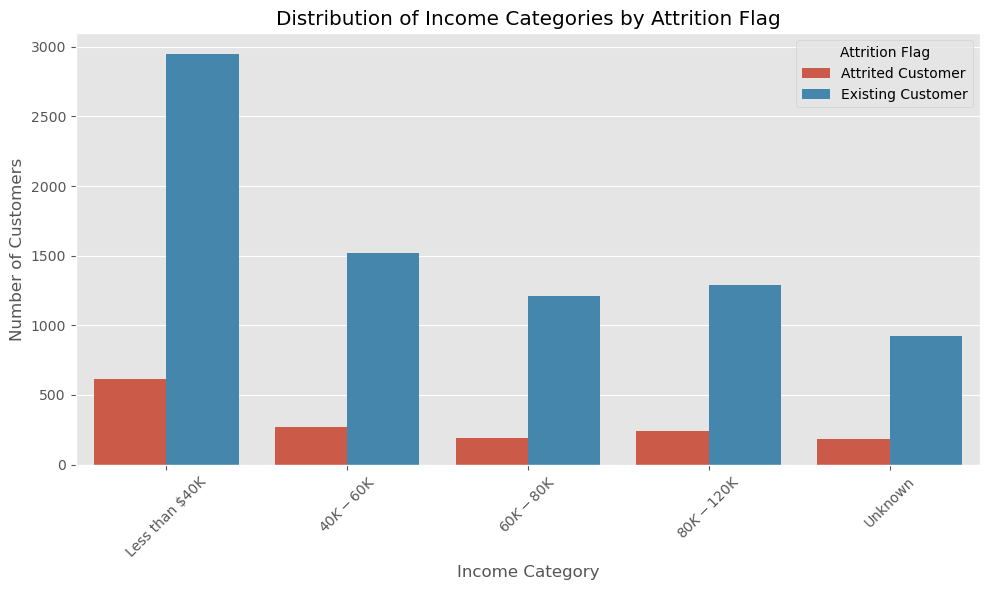

In [42]:
# Create a bar plot
attrition_income_counts = credit_card_data.groupby(['Income_Category', 'Attrition_Flag']).size().reset_index(name = 'Count')
income_order = ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', 'Unknown']

plt.figure(figsize = (10, 6))
sns.barplot(data = attrition_income_counts, x = 'Income_Category', y = 'Count', hue = 'Attrition_Flag', order = income_order)

# Customization
plt.title('Distribution of Income Categories by Attrition Flag')
plt.xlabel('Income Category')
plt.ylabel('Number of Customers')
plt.legend(title = 'Attrition Flag')
plt.xticks(rotation = 45)  
plt.tight_layout()
plt.show()

### Card Category

In [46]:
# Reviewing all values in income category
credit_card_data['Card_Category'].value_counts()

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

In [48]:
card_category_percentage = credit_card_data['Card_Category'].value_counts(normalize = True) * 100
card_category_percentage

Card_Category
Blue        93.176656
Silver       5.480399
Gold         1.145453
Platinum     0.197492
Name: proportion, dtype: float64

 Judging from the above, silver,gold and platinium card holders only constitute **<7%** of the total card holders. I believe it might be more useful to group the rest of the card holders as 'Premium' card holders to allow us to compare and examine the relationship between 'Blue' and 'Premium' card holders.

In [51]:
# Group Silver, Gold, and Platinum into Premium 
credit_card_data['Card_Category_Grouped'] = credit_card_data['Card_Category'].replace(
    {'Silver': 'Premium', 'Gold': 'Premium', 'Platinum': 'Premium'}
)
card_category_counts = credit_card_data['Card_Category_Grouped'].value_counts()
card_category_counts

Card_Category_Grouped
Blue       9436
Premium     691
Name: count, dtype: int64

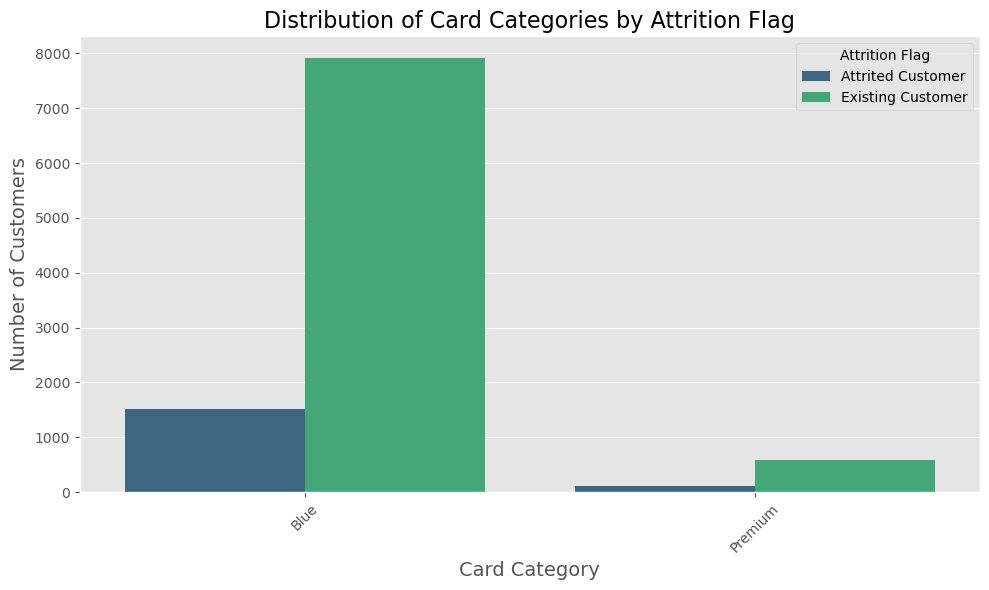

In [53]:
# Card Categories by Attrition Flag
card_category_attrition_counts = credit_card_data.groupby(['Card_Category_Grouped', 'Attrition_Flag']).size().reset_index(name = 'Count')

plt.figure(figsize = (10, 6))
sns.barplot(data = card_category_attrition_counts, x = 'Card_Category_Grouped', y = 'Count', hue = 'Attrition_Flag', palette = 'viridis')

plt.title('Distribution of Card Categories by Attrition Flag', fontsize = 16)
plt.xlabel('Card Category', fontsize = 14)
plt.ylabel('Number of Customers', fontsize = 14)
plt.legend(title = 'Attrition Flag')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()

### Reviewing Numerical Data


In [56]:
# Filtering numerical columns out for easier analysis
num_cols = credit_card_data.select_dtypes(include = np.number).columns.tolist()

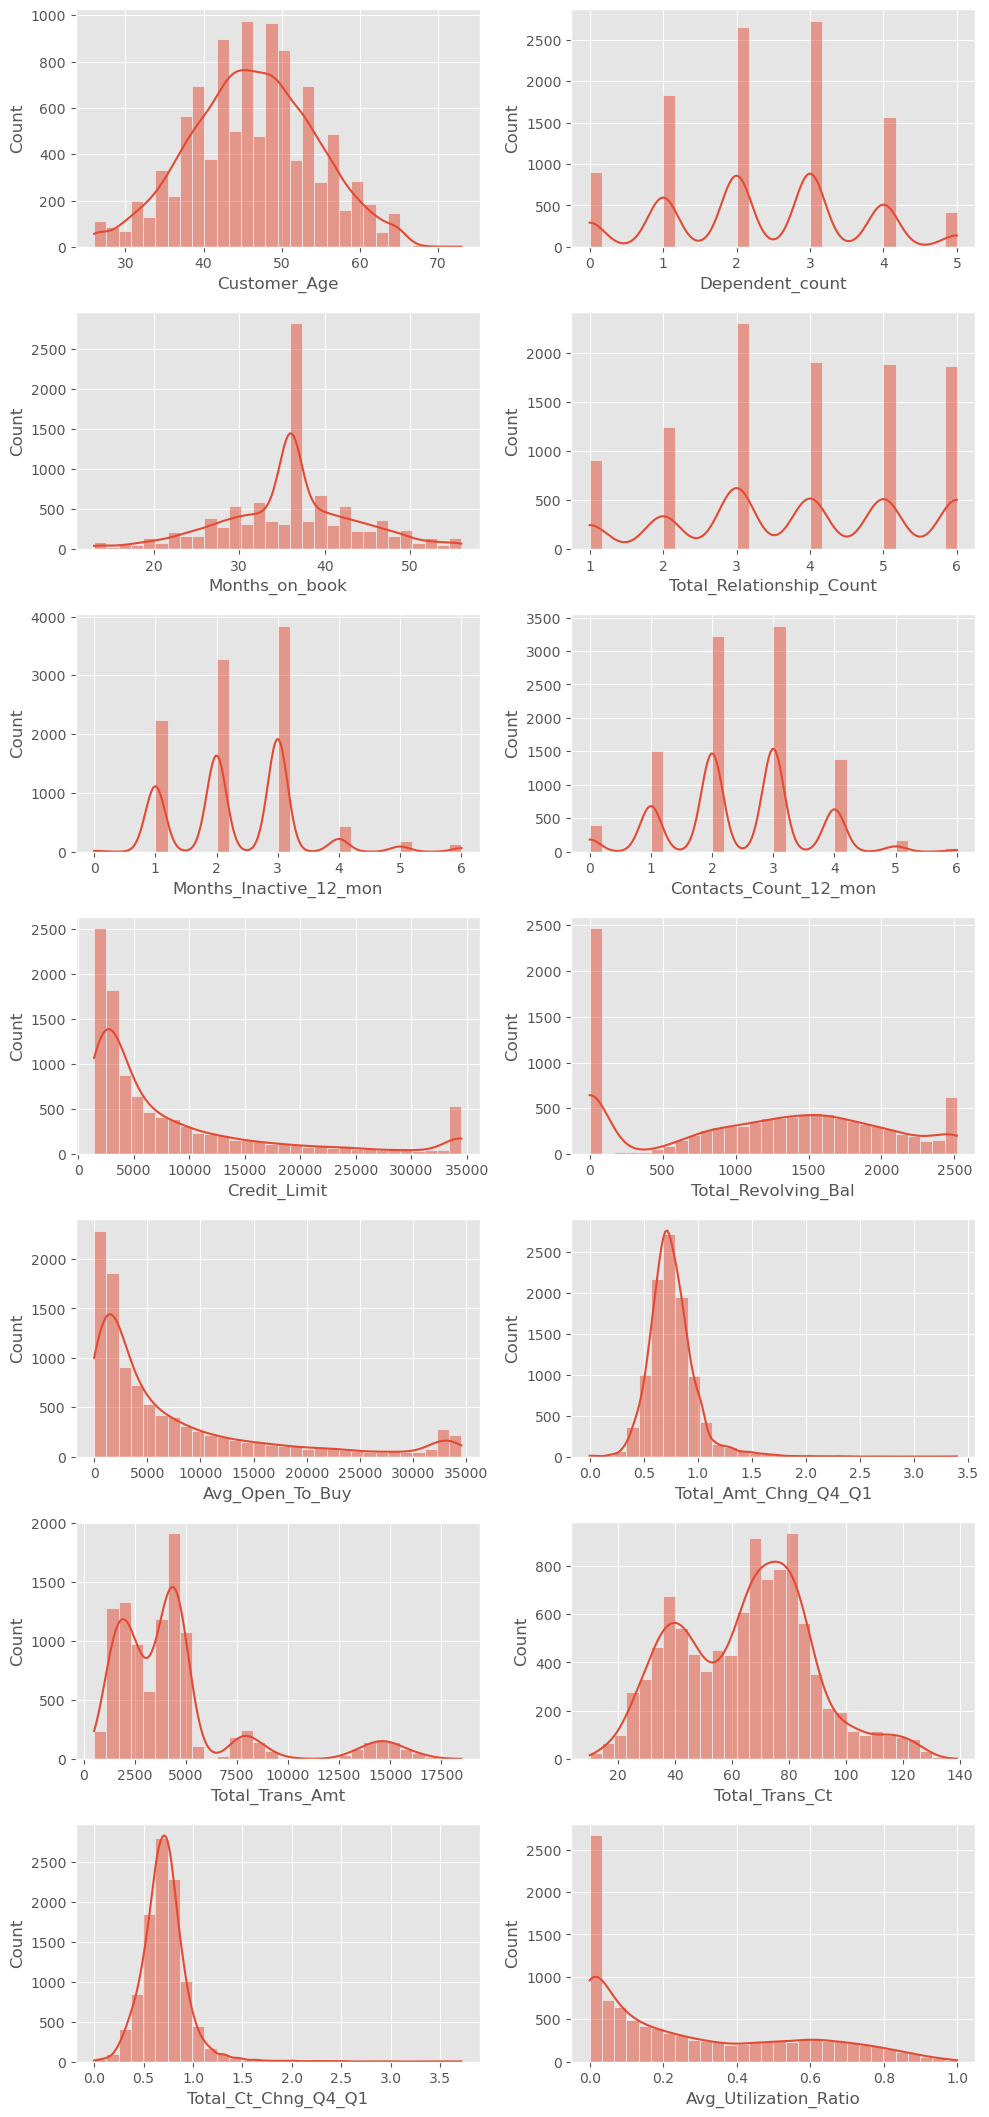

In [139]:
# Plot Histograms for each numerical column
plt.figure(figsize = (10, len(num_cols) * 3))
for i, col in enumerate(num_cols):
    plt.subplot(len(num_cols), 2, i + 1) 
    sns.histplot(credit_card_data[col], bins = 30, kde = True)

plt.tight_layout()
plt.show()

##### Taking a look at the numeric data distribution:
- **Months_on_book**: i.e. the period of relationship with the bank is normally distributed with a high peak, concentrated around 36 months / 3 years (Mean of 35.9 months). This is probably due to the bank having investment products on a 3 year contract basis which in their maturity, resulted in the termination of the customer's relationship with the bank.
  
- **Months_Inactive vs Contacts_Count (12 months)**: there seem to be simiarities in their distribution. Customers are mostly inactive for up to 3 months, while the bank contacts the customers at the highest frequency between 1 to 4 times. It is possible that the bank focuses on trying to contact customers in the initial 1 to 3 months of account inactivity as their customer retention strategy, and stop or reduces the level of activity if the customer is still inactive past 3 months.
  
- **Total_Trans_Amt**: There appears to be 3 groups of transaction volume with gaps at 6k and 11k transactions, indicating that further analysis might be needed.
  
- **Credit_Limit**: Credit limit is influenced by factors such as income, credit utilization ratio, credit card attributes etc. The distribution is right skewed with outlier peak at 35000, suggesting that while many customers might be at the lower end of the income scale, there is a small concentration of customers that have capped credit limits. It is possible that their credit score may allow them to have higher credit limits but the max cap of their credit card is at 35000, thus creating a plateau.

    There may be a potential disconnect here between customer creditworthiness and the limits set by the bank, and the bank should reach out to these customers on increasing their credit limit and offering them more financial flexibility. 

-  **Average_Utilization_Ratio**: The percentage of a borrower’s total available credit that is currently being used. There is a high peak at near 0 percent credit utilization and is healthy from a credit risk perspective. This is followed by a sharp drop in frequency as the ratio increases and there is a small plateau around 0.4 to 0.6 before a decline to a very small number of high utilization customers (>0.7). Targeted intervention maybe required for the high utilization segment. 

### Age(bins)

We can already see that the largest amount of customers is between *40 to 50*. However, to better visualise the data, lets aggregate the values into custom bins.
We know we have a Min and Max age of **26** and **73** , we can create bins in this range to have a clearer picture of the age distribution.

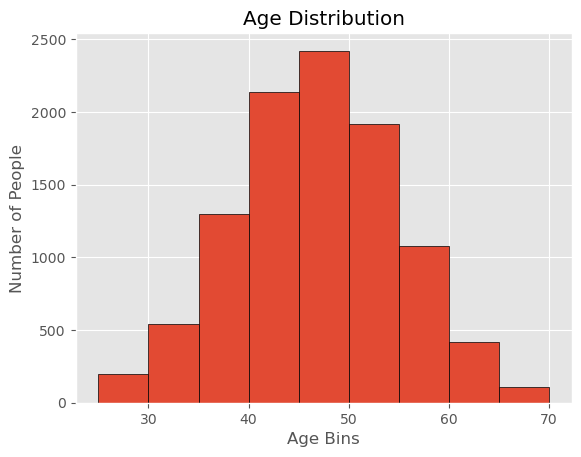

In [77]:
# Age(bins)
bins = range(25, 75, 5) 
plt.hist(credit_card_data['Customer_Age'], bins = bins, edgecolor = 'black')

# Customization
plt.title('Age Distribution')
plt.xlabel('Age Bins')
plt.ylabel('Number of People')
plt.show()

### Pair plots

Avg_Open_To_Buy: Less relevant as it's derived from credit limits.
Total_Amt_Chng_Q4_Q1 and Total_Ct_Chng_Q4_Q1: These are change metrics that may be less useful for a snapshot analysis.

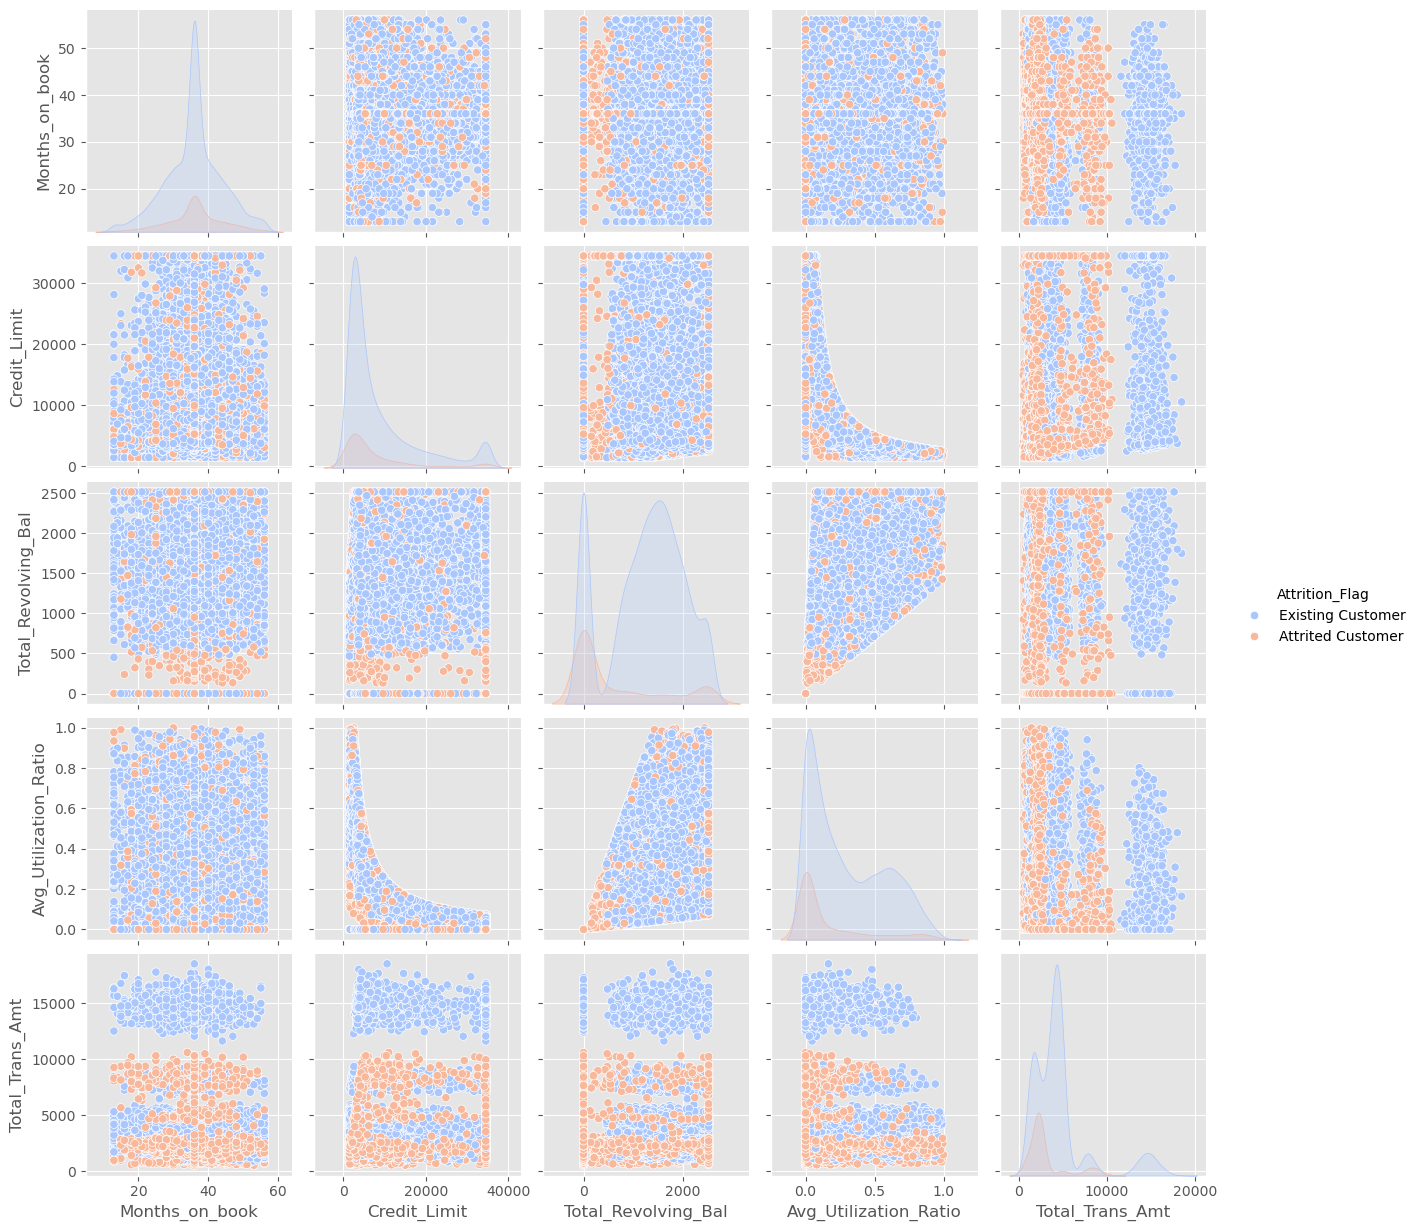

In [135]:
selected_features = [
    'Months_on_book',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Avg_Utilization_Ratio',
    'Total_Trans_Amt',
    'Attrition_Flag'  # Including attrition flag for color coding
]
sns.pairplot(credit_card_data[selected_features], hue = 'Attrition_Flag', palette = 'coolwarm')
plt.show()

# Correlation Analysis

In [59]:
credit_card_data.corr(numeric_only=True)

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
Customer_Age,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808
Total_Amt_Chng_Q4_Q1,-0.062042,-0.035439,-0.048959,0.050119,-0.032247,-0.024445,0.012813,0.058174,0.007595,1.000000,0.039678,0.005469,0.384189,0.035235


We can see some high correlation pairs like months_on_book vs customer_age but its hard to find the right statistics, I will be using seaborn heatmap to help visualise this better.

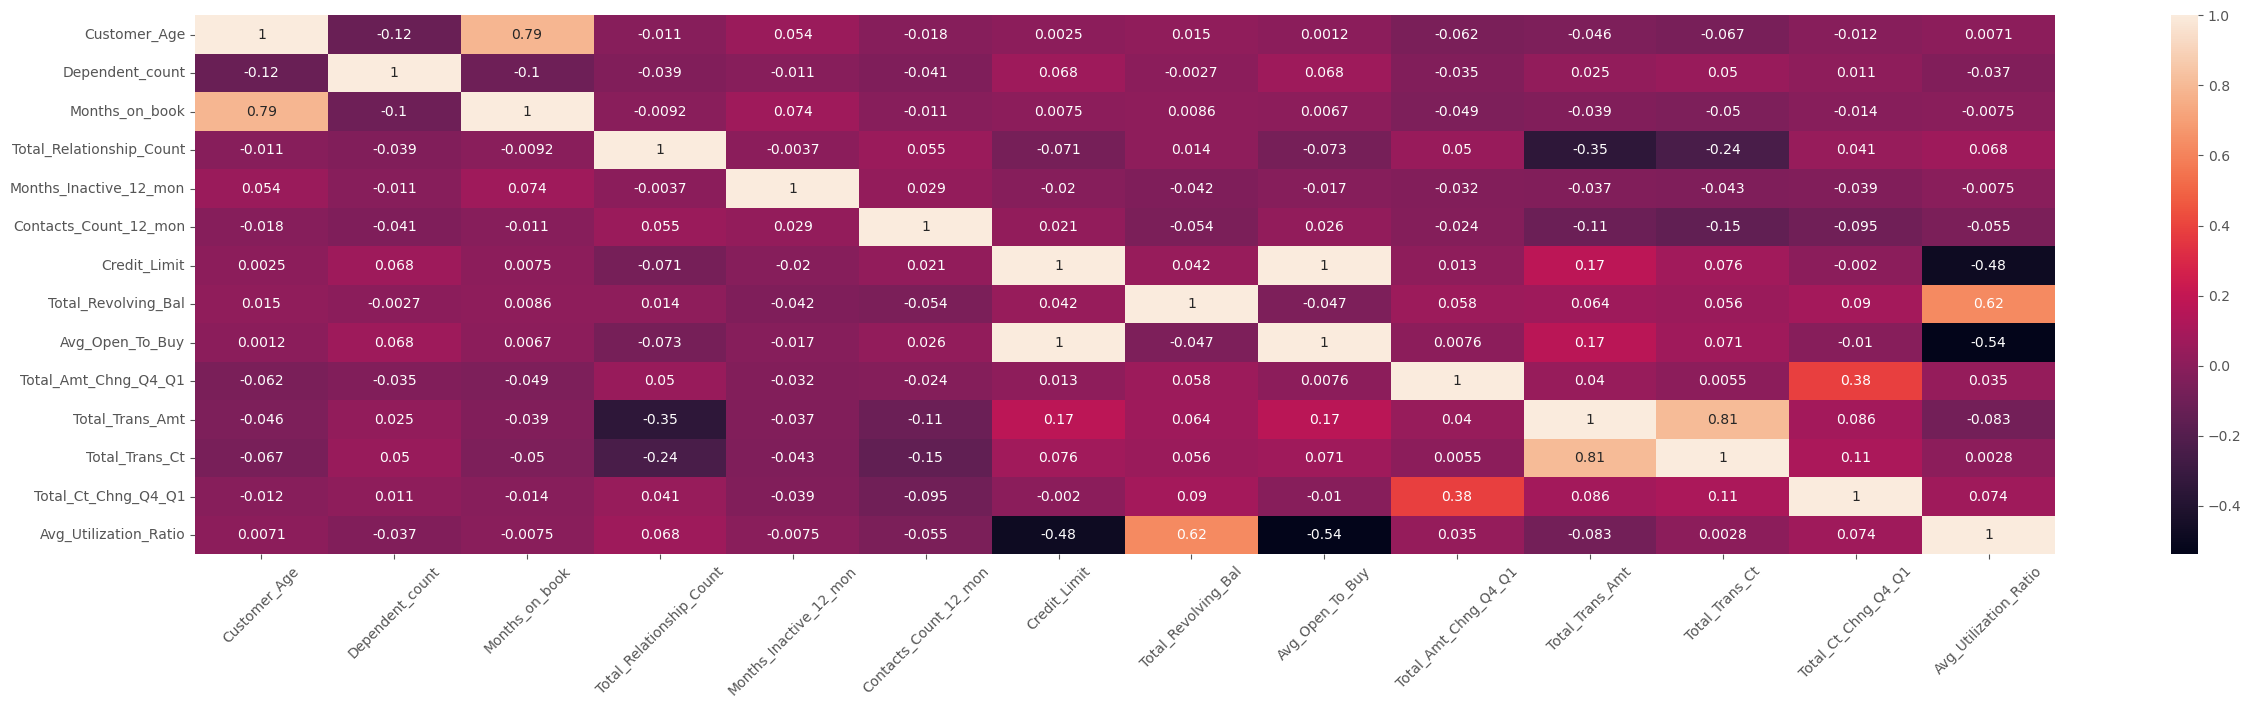

In [115]:
sns.heatmap(credit_card_data.corr(numeric_only = True), annot = True)
plt.rcParams['figure.figsize'] = (30,7)
plt.xticks(rotation = 45)  
plt.show()